# Assignment 1
This assignments contains 3 sections:
- Thresholding
- Denoising
- Sobel Edge Detector
The image folder is relative, so the absolute path is printed by the below code block

In [98]:
# All imports
from os.path import abspath, join
import numpy as np
from matplotlib.pyplot import imshow, subplots
from cv2 import PSNR, filter2D, imread
from scipy.ndimage import gaussian_filter as gauss_filter
from math import sqrt

# The path to the images is the relative path in this repo `./images`
image_folder = abspath('./images')
print("image folder: " + image_folder)

image folder: /home/alix/Desktop/school/semester_5/ECSE-415/assignment1/images


## Thresholding

### 1.

In [99]:
image_path = join(image_folder, 'numbers.jpg')
image = imread(image_path, 0)

def threshold_image(img, threshold:int):
    """
    This function will set pixel value to 255 if current value is above threshold, otherwise 0
    @param img: the image to process
    @param threshold: a number for the threshold
    @returns the transformed image in numpy array format
    """
    copy = np.array(img, copy=True)
    copy[copy > threshold] = 255
    copy[copy <= threshold] = 0
    return copy

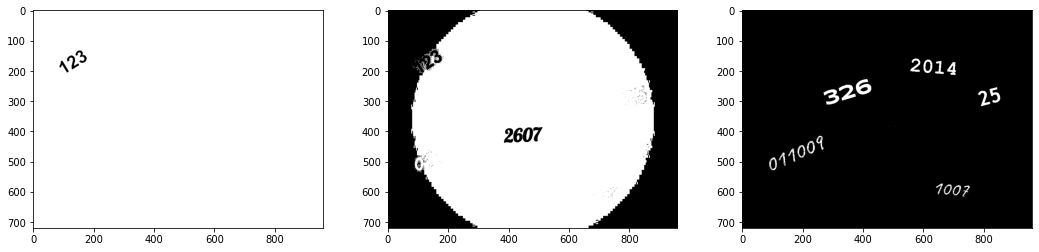

In [100]:
f, single_threshold = subplots(1, 3, figsize=(18, 4))

# threshold of 80
single_threshold[0].imshow(threshold_image(image, 80), cmap='gray')

# threshold of 140
single_threshold[1].imshow(threshold_image(image, 140), cmap='gray')

# threshold of 200
single_threshold[2].imshow(threshold_image(image, 200), cmap='gray')

### 2. 
At threshold ... , we can see ... numbers:
- 80: 1 (123)
- 140: 1 (2607)
- 200: 5 (011009, 326, 2014, 25, 1007)

Because there is a gradient background, the threshold makes a circle in the shape of the gradient at threshold 140. At this gradiant, the circle causes sone numbers to only be half seen. At threshold 80, we can only see the number 123 because the background is lighter than 80 and 123 is the only number darker than 80. At threshold 200, we can only see numbers which are lighter than 200 because the background is darker than 200.


### 3. 

In [101]:
def window_threshold_image(img, low_threshold:int, high_threshold:int):
    """
    This function will set pixel value to 255 if current value is between the two thresholds, otherwise 0
    @param img: the image to process
    @param low_threshold: a number for the lower threshold
    @param high_threshold: a number for the higher threshold
    @returns the transformed image in numpy array format
    """
    copy = np.array(img, copy=True)
    copy[np.logical_or(low_threshold >= copy, copy >= high_threshold)] = 0
    copy[np.logical_and(low_threshold < copy, copy < high_threshold)] = 255
    return copy

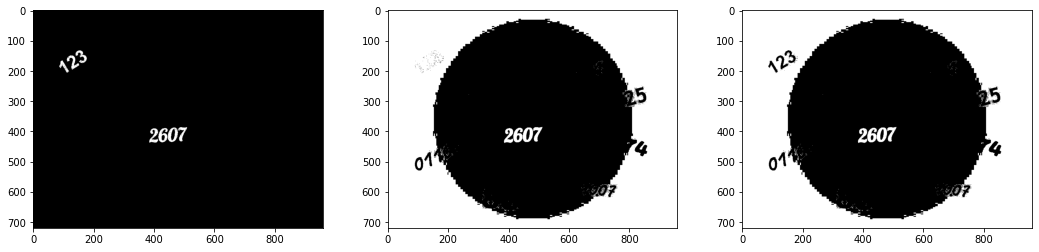

In [102]:
f, window_threshold = subplots(1, 3, figsize=(18, 4))

# window threshold of 60, 110
window_threshold[0].imshow(window_threshold_image(image, 60, 110), cmap='gray')

# window threshold of 60, 150
window_threshold[1].imshow(window_threshold_image(image, 60, 150), cmap='gray')

# window threshold of 90, 150
window_threshold[2].imshow(window_threshold_image(image, 90, 150), cmap='gray')

At threshold ... - ... , we can see ... numbers:
- 60 - 110: 2 (123, 2607)
- 60 - 150: 1 (2607)
- 90 - 150: 2 (123, 2607)

### 4. 

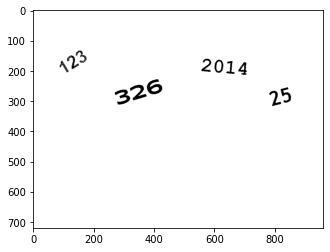

In [103]:
imshow(window_threshold_image(image, 70, 230), cmap='gray')


123 is the darkest number on the picture. By trial and error (trying 60, 70 80), we know that 123's value is under 70.
326, 2014 and 25 are the lightest numbers on the picture. By trial and error (trying 220, 230, 240), we know that they are all higher than 220

## Denoising

### 1. 

In [104]:
def convolution(image, matrix_filter):
    """
    This function will apply a filter onto an image by convolution.
    @param image: the unprocessed image, in numpy array format
    @param matrix_filter: the filter that will be applied onto the image. Must be in numpy array format.
    @returns the processed image
    """
    filter_x_half_len = int((matrix_filter.shape[0] - 1) / 2)
    filter_y_half_len = int((matrix_filter.shape[1] - 1) / 2)
    copy = np.zeros(image.shape)
    for i, v1 in enumerate(image):
        for j, v2 in enumerate(v1):
            for k, v3 in enumerate(matrix_filter):
                # we assume here that the filter horizontal length is uneven
                x_coordinate = i + k - filter_x_half_len
                if x_coordinate < 0 or x_coordinate >= len(image):
                    continue
                for l, v4 in enumerate(v3):
                    # we assume here that the filter vertical length is uneven
                    y_coordinate = j + l - filter_y_half_len
                    if y_coordinate < 0 or y_coordinate >= len(v1):
                        continue
                    copy[x_coordinate][y_coordinate] += v2 * v4
    return copy
    

In [105]:
original_image_path = join(image_folder, 'Tower.png')
original_image = imread(original_image_path, 0)
gauss_image_path = join(image_folder, 'Tower_Gauss_Noise.png')
gauss_image = imread(gauss_image_path, 0)
pepper_image_path = join(image_folder, 'Tower_Salt_and_Pepper_Noise.png')
pepper_image = imread(pepper_image_path, 0)

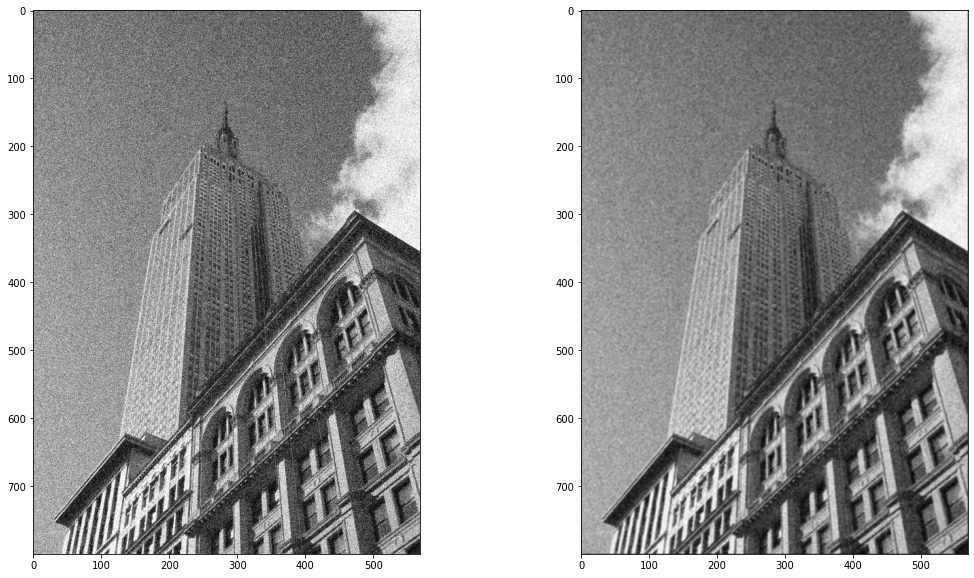

In [106]:
gaussian_filter = gauss_filter(np.array([[0,0,0], [0,1,0], [0,0,0]], float), 2)   

f, gaussian = subplots(1, 2, figsize=(18, 10))

# original image
gaussian[0].imshow(gauss_image, cmap='gray')

# filtered image
gaussian_filtered_image = convolution(gauss_image, gaussian_filter)
gaussian[1].imshow(gaussian_filtered_image, cmap='gray')

### 2. 

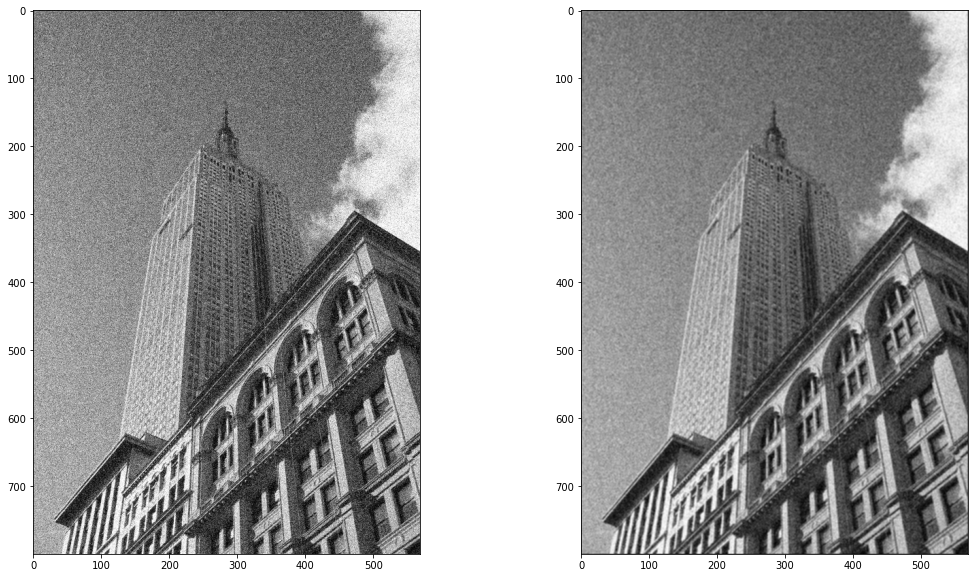

In [107]:
box_filter = np.array([[1 / 9, 1 / 9, 1 / 9], [1 / 9, 1 / 9, 1 / 9], [1 / 9, 1 / 9, 1 / 9]])       

f, box = subplots(1, 2, figsize=(18, 10))

# original image
box[0].imshow(gauss_image, cmap='gray')

# filtered image
box_filtered_image = convolution(gauss_image, box_filter)
box[1].imshow(box_filtered_image, cmap='gray')

### 3. 
The gaussian filter gives a better result

In [108]:
# PSNR for gaussian
print("gaussian filtered PSNR: " + str(PSNR(original_image, np.uint8(gaussian_filtered_image))))

# PSNR for gaussian
print("box filtered PSNR: " + str(PSNR(original_image, np.uint8(box_filtered_image))))

gaussian filtered PSNR: 24.54593238731451
box filtered PSNR: 24.539547144175252


### 4. 

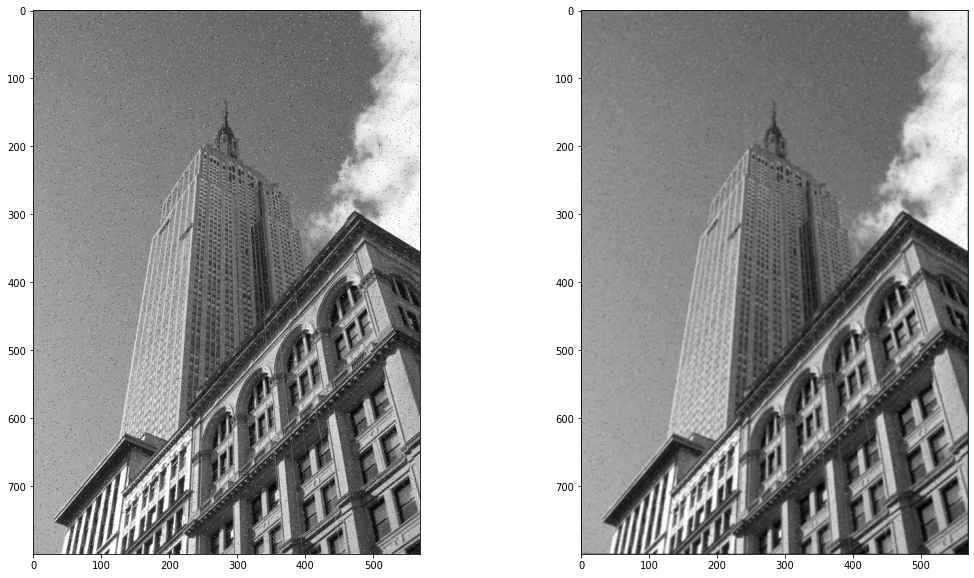

In [109]:
f, gaussian = subplots(1, 2, figsize=(18, 10))

# original image
gaussian[0].imshow(pepper_image, cmap='gray')

# filtered image
gaussian_filtered_image = convolution(pepper_image, gaussian_filter)
gaussian[1].imshow(gaussian_filtered_image, cmap='gray')

### 5. 

In [110]:
def get_median(arr):
    """
    This function will return the median of the inputted array
    @param arr: the initial array
    @returns the median
    """
    arr.sort()
    length = len(arr)
    if length % 2 == 0:
        return arr[int(length / 2)] + arr[int(length / 2) - 1]
    else:
        return arr[int((length - 1) / 2)]

def median_filter(image, filter_shape):
    """
    This function will apply a median filter onto an image.
    @param image: the unprocessed image, in numpy array format
    @param matrix_filter: the filter that will be applied onto the image. Must be in numpy array format.
    @returns the processed image
    """
    filter_x_half_len = int((filter_shape[0] - 1) / 2)
    filter_y_half_len = int((filter_shape[1] - 1) / 2)
    copy = np.zeros(image.shape)
    for i, v1 in enumerate(image):
        for j, v2 in enumerate(v1):
            all_values = []
            for k in range(filter_shape[0]):
                # we assume here that the filter horizontal length is uneven
                x_coordinate = i + k - filter_x_half_len
                if x_coordinate < 0 or x_coordinate >= len(image):
                    continue
                for l in range(filter_shape[1]):
                    # we assume here that the filter vertical length is uneven
                    y_coordinate = j + l - filter_y_half_len
                    if y_coordinate < 0 or y_coordinate >= len(v1):
                        continue
                    all_values.append(image[x_coordinate][y_coordinate])
            copy[i][j] = get_median(all_values)
    return copy

/tmp/ipykernel_13493/4198800222.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  return arr[int(length / 2)] + arr[int(length / 2) - 1]


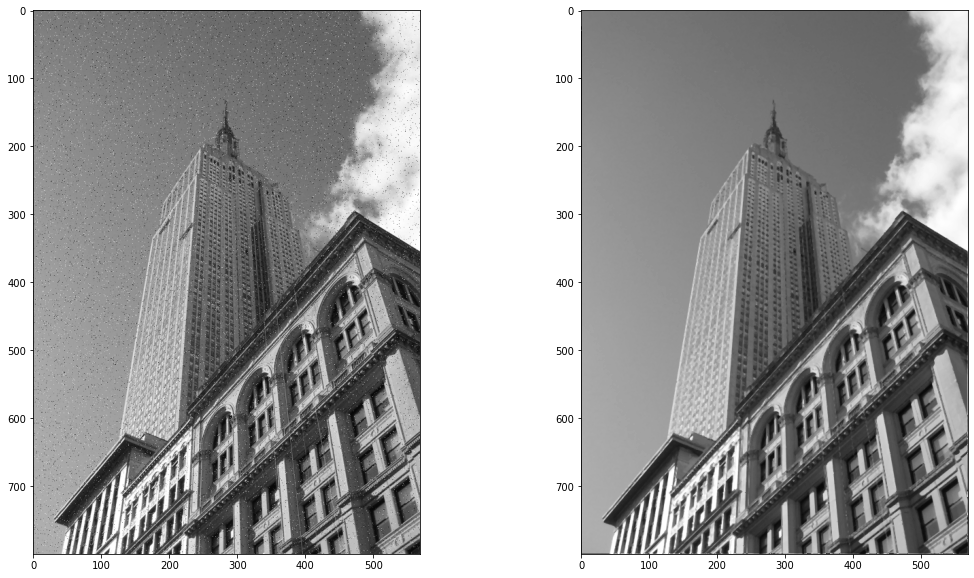

In [111]:
f, median = subplots(1, 2, figsize=(18, 10))

# original image
median[0].imshow(pepper_image, cmap='gray')

# filtered image
median_filtered_image = median_filter(pepper_image, (3, 3))
median[1].imshow(median_filtered_image, cmap='gray')

### 6. 
The median filter gives better results.

In [112]:
# PSNR for gaussian
print("gaussian filtered PSNR: " + str(PSNR(original_image, np.uint8(gaussian_filtered_image))))

# PSNR for gaussian
print("median filtered PSNR: " + str(PSNR(original_image, np.uint8(median_filtered_image))))

gaussian filtered PSNR: 25.916387852252114
median filtered PSNR: 27.048481050145263


## Sobel Edge Detector

### 1. 
I used vertical Sobel filters.

In [113]:
original_image_path = join(image_folder, 'Circles.png')
original_image = imread(original_image_path, 0)
gauss_image_path = join(image_folder, 'Circles_gauss.png')
gauss_image = imread(gauss_image_path, 0)

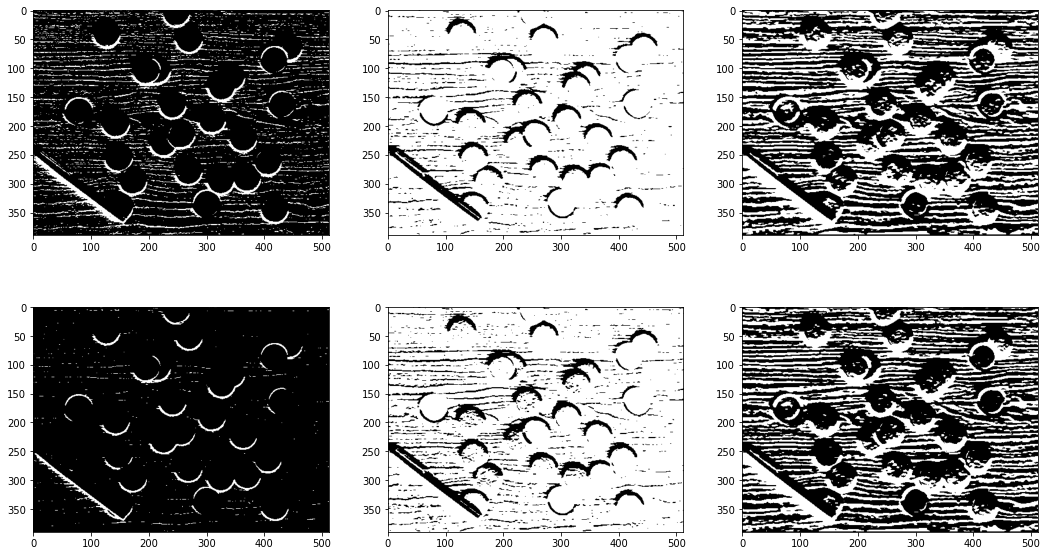

In [114]:
f, median = subplots(2, 3, figsize=(18, 10))

sobel_3x3 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_5x5 = np.array([[-1, -2, -3, -2, -1], [-2, -3, -4, -3, -1], [0, 0, 0, 0, 0], [2, 3, 4, 3, 2], [1, 2, 3, 2, 1]])
sobel_7x7 = np.array([[-1, -2, -3, -4, -3, -2, -1], [-2, -3, -4, -5, -4, -3, -2], [-3, -4, -5, -6, -5, -4, -3], [0, 0 ,0 ,0 ,0 ,0 ,0], [3, 4, 5, 6, 5, 4, 3], [2, 3, 4, 5, 4, 3, 2], [1, 2, 3, 4, 3, 2, 1]])

# Sobel 3x3 filter and 10% threshold
median[0, 0].imshow(threshold_image(filter2D(original_image, -1, sobel_3x3), int(0.1 * 255)), cmap='gray')

# Sobel 5x5 filter and 10% threshold
median[0, 1].imshow(threshold_image(filter2D(original_image, -1, sobel_5x5), int(0.1 * 255)), cmap='gray')

# Sobel 7x7 filter and 10% threshold
median[0, 2].imshow(threshold_image(filter2D(original_image, -1, sobel_7x7), int(0.1 * 255)), cmap='gray')

# Sobel 3x3 filter and 20% threshold
median[1, 0].imshow(threshold_image(filter2D(original_image, -1, sobel_3x3), int(0.2 * 255)), cmap='gray')

# Sobel 5x5 filter and 20% threshold
median[1, 1].imshow(threshold_image(filter2D(original_image, -1, sobel_5x5), int(0.2 * 255)), cmap='gray')

# Sobel 7x7 filter and 20% threshold
median[1, 2].imshow(threshold_image(filter2D(original_image, -1, sobel_7x7), int(0.2 * 255)), cmap='gray')

### 2 .
The smaller the Sobel filter is, we have better localization, but we are more subject to noise and poor detection.
The bigger the Sobel filter is, we have poorer localization, but less noise and better detection.

### 3. 


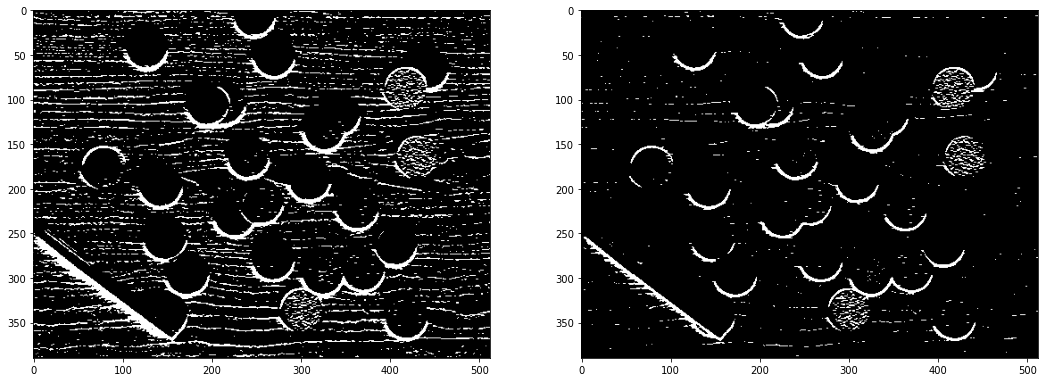

In [115]:
f, median = subplots(1, 2, figsize=(18, 10))

sobel_3x3 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_5x5 = np.array([[-1, -2, -3, -2, -1], [-2, -3, -4, -3, -1], [0, 0, 0, 0, 0], [2, 3, 4, 3, 2], [1, 2, 3, 2, 1]])
sobel_7x7 = np.array([[-1, -2, -3, -4, -3, -2, -1], [-2, -3, -4, -5, -4, -3, -2], [-3, -4, -5, -6, -5, -4, -3], [0, 0 ,0 ,0 ,0 ,0 ,0], [3, 4, 5, 6, 5, 4, 3], [2, 3, 4, 5, 4, 3, 2], [1, 2, 3, 4, 3, 2, 1]])

# Sobel 3x3 filter and 10% threshold
median[0].imshow(threshold_image(filter2D(gauss_image, -1, sobel_3x3), int(0.1 * 255)), cmap='gray')

# Sobel 3x3 filter and 20% threshold
median[1].imshow(threshold_image(filter2D(gauss_image, -1, sobel_3x3), int(0.2 * 255)), cmap='gray')

### 4. 

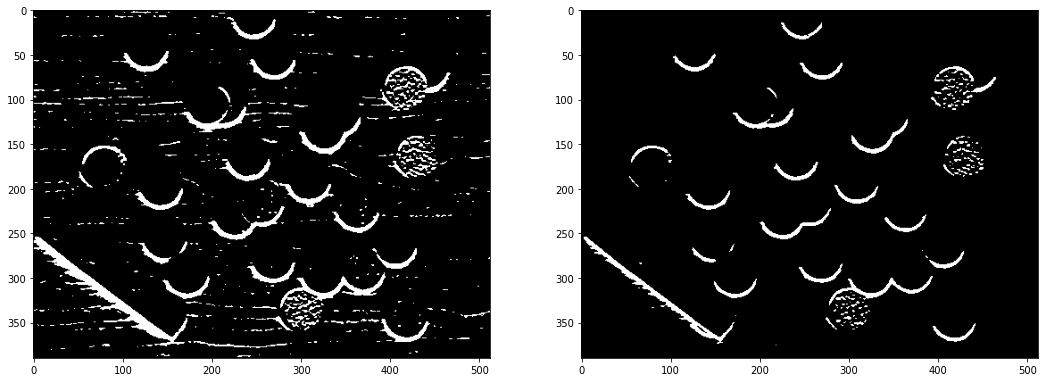

In [116]:
f, median = subplots(1, 2, figsize=(18, 10))

sobel_3x3 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_5x5 = np.array([[-1, -2, -3, -2, -1], [-2, -3, -4, -3, -1], [0, 0, 0, 0, 0], [2, 3, 4, 3, 2], [1, 2, 3, 2, 1]])
sobel_7x7 = np.array([[-1, -2, -3, -4, -3, -2, -1], [-2, -3, -4, -5, -4, -3, -2], [-3, -4, -5, -6, -5, -4, -3], [0, 0 ,0 ,0 ,0 ,0 ,0], [3, 4, 5, 6, 5, 4, 3], [2, 3, 4, 5, 4, 3, 2], [1, 2, 3, 4, 3, 2, 1]])

# Sobel 3x3 filter, 10% threshold and box filtering
median[0].imshow(threshold_image(filter2D(filter2D(gauss_image, -1, box_filter), -1, sobel_3x3), int(0.1 * 255)), cmap='gray')

# Sobel 3x3 filter, 20% threshold and box filtering
median[1].imshow(threshold_image(filter2D(filter2D(gauss_image, -1, box_filter), -1, sobel_3x3), int(0.2 * 255)), cmap='gray')

### 5. 
Using a box filter removes a lot of the noise created by the wood grain at the 2 thresholds. The filter at the 20% threshold gives better results because it removes even more noise.